# The Tutorial of Paul et al (2015) for [desc](https://eleozzr.github.io/desc)
- The reproducible of DESC for Paul's data

In [1]:
import os              
os.environ['PYTHONHASHSEED'] = '0'
import desc          
import pandas as pd                                                    
import numpy as np                                                     
import scanpy.api as sc                                                                                 
from time import time                                                       
import sys
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
sc.settings.set_figure_params(dpi=300)

Using TensorFlow backend.


In [2]:
print(sys.version)

3.5.3 |Continuum Analytics, Inc.| (default, Mar  6 2017, 11:58:13) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [3]:
sc.logging.print_versions()

scanpy==1.3.6 anndata==0.6.18 numpy==1.14.6 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [4]:
desc.__version__

'1.0.0.2'

In [5]:
#we have downloaded this data, if not, the following will download data automatically
adata=sc.datasets.paul15()
adata.obs['celltype']=adata.obs['paul15_clusters'].str.split("[0-9]{1,2}", n = 1, expand = True).values[:,1]
adata.obs['celltype2']=adata.obs['paul15_clusters']

... storing 'paul15_clusters' as categorical


In [6]:
import desc

In [7]:
sc.pp.log1p(adata)
sc.pp.filter_genes_dispersion(adata,n_top_genes=1000)
sc.pp.scale(adata,max_value=6)
save_dir="paul_result"
adata=desc.train(adata,
        dims=[adata.shape[1],64,32],
        tol=0.005,
        n_neighbors=10,
        batch_size=256,
        louvain_resolution=[0.8,1.0],# not necessarily a list, you can only set one value, like, louvain_resolution=1.0
        save_dir=str(save_dir),
        do_tsne=True,
        learning_rate=200, # the parameter of tsne
        use_GPU=False,
        num_Cores=1, #for reproducible, only use 1 cpu
        num_Cores_tsne=4,
        save_encoder_weights=False,
        save_encoder_step=3,# save_encoder_weights is False, this parameter is not used
        use_ae_weights=False,
        do_umap=False) #if do_uamp is False, it will don't compute umap coordiate

Start to process resolution= 0.8
The number of cpu in your computer is 12
Checking whether paul_result/ae_weights,h5  exists in the directory
Pretraining the 1th layer...
learning rate = 0.1
Epoch 1/50
2730/2730 [==============================] - 0s 99us/step - loss: 0.9989
Epoch 2/50
2730/2730 [==============================] - 0s 68us/step - loss: 0.9650
Epoch 3/50
2730/2730 [==============================] - 0s 68us/step - loss: 0.9123
Epoch 4/50
2730/2730 [==============================] - 0s 65us/step - loss: 0.8454
Epoch 5/50
2730/2730 [==============================] - 0s 62us/step - loss: 0.8024
Epoch 6/50
2730/2730 [==============================] - 0s 62us/step - loss: 0.7768
Epoch 7/50
2730/2730 [==============================] - 0s 61us/step - loss: 0.7565
Epoch 8/50
2730/2730 [==============================] - 0s 65us/step - loss: 0.7414
Epoch 9/50
2730/2730 [==============================] - 0s 63us/step - loss: 0.7293
Epoch 10/50
2730/2730 [==============================

2730/2730 [==============================] - 0s 62us/step - loss: 0.6499
Epoch 19/50
2730/2730 [==============================] - 0s 66us/step - loss: 0.6497
Epoch 20/50
2730/2730 [==============================] - 0s 66us/step - loss: 0.6503
Epoch 00020: early stopping
The 1th layer has been pretrained.
Pretraining the 2th layer...
learning rate = 0.1
Epoch 1/50
2730/2730 [==============================] - 0s 31us/step - loss: 1.4115
Epoch 2/50
2730/2730 [==============================] - 0s 7us/step - loss: 0.9837
Epoch 3/50
2730/2730 [==============================] - 0s 6us/step - loss: 0.7769
Epoch 4/50
2730/2730 [==============================] - 0s 8us/step - loss: 0.6489
Epoch 5/50
2730/2730 [==============================] - 0s 7us/step - loss: 0.5653
Epoch 6/50
2730/2730 [==============================] - 0s 6us/step - loss: 0.5002
Epoch 7/50
2730/2730 [==============================] - 0s 8us/step - loss: 0.4502
Epoch 8/50
2730/2730 [==============================] - 0s 8us/

2730/2730 [==============================] - 0s 59us/step - loss: 0.6267
Epoch 9/50
2730/2730 [==============================] - 0s 61us/step - loss: 0.6255
Epoch 10/50
2730/2730 [==============================] - 0s 58us/step - loss: 0.6242
Epoch 11/50
2730/2730 [==============================] - 0s 58us/step - loss: 0.6231
Epoch 12/50
2730/2730 [==============================] - 0s 59us/step - loss: 0.6220
Epoch 13/50
2730/2730 [==============================] - 0s 60us/step - loss: 0.6209
Epoch 14/50
2730/2730 [==============================] - 0s 60us/step - loss: 0.6200
Epoch 15/50
2730/2730 [==============================] - 0s 58us/step - loss: 0.6191
Epoch 16/50
2730/2730 [==============================] - 0s 66us/step - loss: 0.6182
Epoch 17/50
2730/2730 [==============================] - 0s 61us/step - loss: 0.6174
Epoch 18/50
2730/2730 [==============================] - 0s 62us/step - loss: 0.6165
Epoch 19/50
2730/2730 [==============================] - 0s 62us/step - loss: 

2730/2730 [==============================] - 0s 60us/step - loss: 0.5981
Epoch 5/50
2730/2730 [==============================] - 0s 57us/step - loss: 0.5981
Epoch 6/50
2730/2730 [==============================] - 0s 56us/step - loss: 0.5981
Epoch 7/50
2730/2730 [==============================] - 0s 60us/step - loss: 0.5981
Epoch 8/50
2730/2730 [==============================] - 0s 55us/step - loss: 0.5981
Epoch 9/50
2730/2730 [==============================] - 0s 56us/step - loss: 0.5981
Epoch 10/50
2730/2730 [==============================] - 0s 63us/step - loss: 0.5981
Epoch 11/50
2730/2730 [==============================] - 0s 58us/step - loss: 0.5981
Epoch 12/50
2730/2730 [==============================] - 0s 60us/step - loss: 0.5981
Epoch 13/50
2730/2730 [==============================] - 0s 59us/step - loss: 0.5981
Epoch 14/50
2730/2730 [==============================] - 0s 57us/step - loss: 0.5981
Epoch 15/50
2730/2730 [==============================] - 0s 58us/step - loss: 0.59

2730/2730 [==============================] - 0s 56us/step - loss: 0.5979
learning rate = 0.0001
Epoch 1/50
2730/2730 [==============================] - 0s 103us/step - loss: 0.5979
Epoch 2/50
2730/2730 [==============================] - 0s 57us/step - loss: 0.5979
Epoch 3/50
2730/2730 [==============================] - 0s 59us/step - loss: 0.5979
Epoch 4/50
2730/2730 [==============================] - 0s 57us/step - loss: 0.5979
Epoch 5/50
2730/2730 [==============================] - 0s 56us/step - loss: 0.5979
Epoch 6/50
2730/2730 [==============================] - 0s 59us/step - loss: 0.5979
Epoch 7/50
2730/2730 [==============================] - 0s 57us/step - loss: 0.5979
Epoch 8/50
2730/2730 [==============================] - 0s 61us/step - loss: 0.5979
Epoch 9/50
2730/2730 [==============================] - 0s 59us/step - loss: 0.5979
Epoch 10/50
2730/2730 [==============================] - 0s 58us/step - loss: 0.5979
Epoch 11/50
2730/2730 [==============================] - 0s 57

2730/2730 [==============================] - 0s 67us/step - loss: 0.5979
Epoch 46/50
2730/2730 [==============================] - 0s 67us/step - loss: 0.5979
Epoch 47/50
2730/2730 [==============================] - 0s 67us/step - loss: 0.5979
Epoch 48/50
2730/2730 [==============================] - 0s 60us/step - loss: 0.5979
Epoch 49/50
2730/2730 [==============================] - 0s 68us/step - loss: 0.5979
Epoch 50/50
2730/2730 [==============================] - 0s 58us/step - loss: 0.5979
Pretraining time is 70.26705884933472
Pretrained weights are saved to paul_result /ae_weights.h5
...number of clusters is unknown, Initialize cluster centroid using louvain method
The value of delta_label of current 1 th iteration is 0.10622710622710622 >= tol 0.005
Epoch 1/5
2730/2730 [==============================] - 0s 80us/step - loss: 0.0692
Epoch 2/5
2730/2730 [==============================] - 0s 29us/step - loss: 0.0632
Epoch 3/5
2730/2730 [==============================] - 0s 30us/step -

2730/2730 [==============================] - 0s 37us/step - loss: 0.0593
Epoch 4/5
2730/2730 [==============================] - 0s 36us/step - loss: 0.0555
Epoch 5/5
2730/2730 [==============================] - 0s 34us/step - loss: 0.0526
The value of delta_label of current 2 th iteration is 0.08241758241758242 >= tol 0.005
Epoch 1/5
2730/2730 [==============================] - 0s 36us/step - loss: 0.0912
Epoch 2/5
2730/2730 [==============================] - 0s 36us/step - loss: 0.0866
Epoch 3/5
2730/2730 [==============================] - 0s 39us/step - loss: 0.0825
Epoch 4/5
2730/2730 [==============================] - 0s 35us/step - loss: 0.0791
Epoch 5/5
2730/2730 [==============================] - 0s 36us/step - loss: 0.0762
The value of delta_label of current 3 th iteration is 0.05531135531135531 >= tol 0.005
Epoch 1/5
2730/2730 [==============================] - 0s 36us/step - loss: 0.1090
Epoch 2/5
2730/2730 [==============================] - 0s 37us/step - loss: 0.1049
Epoch 

In [8]:
#After training from desc, the results have been saved in `save_dir`
#adata=sc.read("paul_result/adata_desc.h5ad")
adata


AnnData object with n_obs × n_vars = 2730 × 1000 
    obs: 'paul15_clusters', 'celltype', 'celltype2', 'desc_0.8', 'desc_1.0'
    var: 'means', 'dispersions', 'dispersions_norm'
    uns: 'prob_matrix1.0', 'prob_matrix0.8', 'iroot'
    obsm: 'X_Embeded_z0.8', 'X_tsne', 'X_tsne0.8', 'X_Embeded_z1.0', 'X_tsne1.0'

1. The meta.data of each cell has been saved in `adata.obs`, 
2. the representation from `desc` of each cell have been saved in `adata.obsm`('X_Embeded_z1.0')
3. The dimension reduction from `desc` of each cell have beed saved in `adata.obsm`('X_tsne1.0')

# Computing maxmum probability

In [9]:
adata.obs['max.prob']=adata.uns["prob_matrix1.0"].max(1)

# t-SNE plots

... storing 'celltype' as categorical


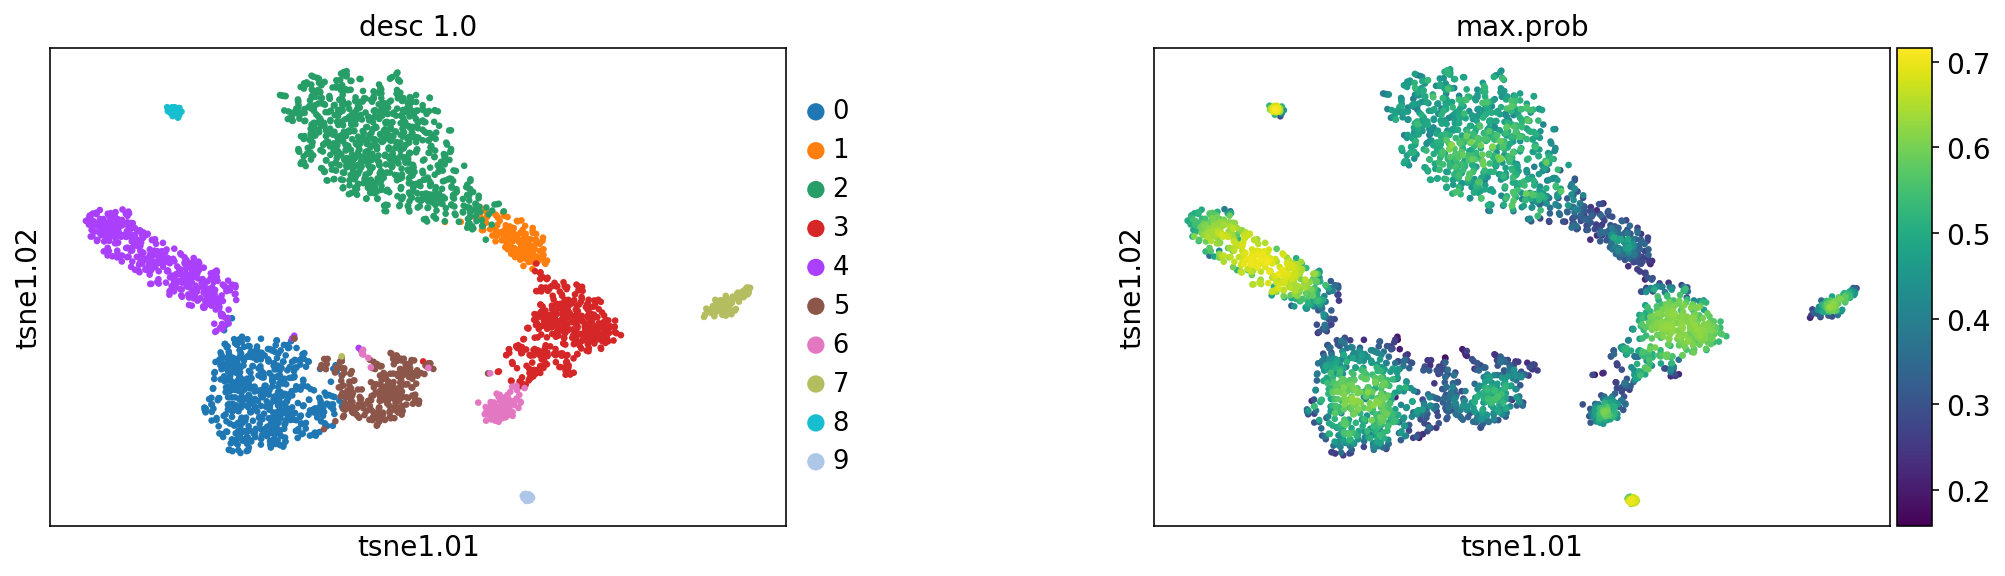

In [10]:
sc.pl.scatter(adata,basis="tsne1.0",color=['desc_1.0','max.prob'])

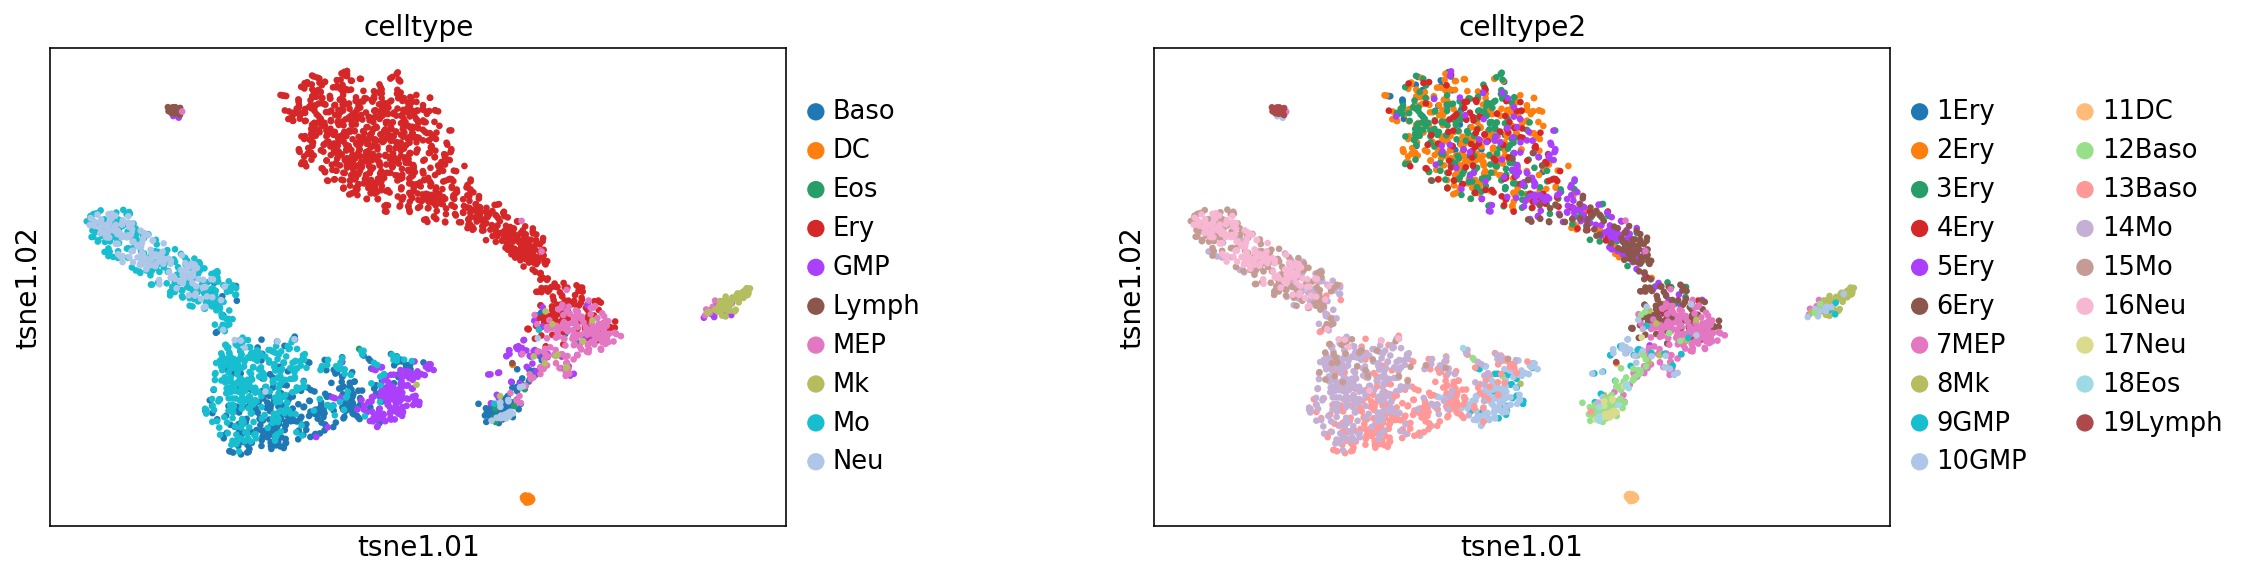

In [11]:
sc.pl.scatter(adata,basis="tsne1.0",color=['celltype','celltype2'])

# reference

1. Paul F, Arkin Y, Giladi A, Jaitin DA et al. Transcriptional heterogeneity and lineage commitment in myeloid progenitors. Cell, 163:1663-167 (2015)